<a href="https://www.kaggle.com/code/yildirimalican/temel-statistik-denemeleri?scriptVersionId=211841498" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [250]:
data = pd.read_csv('/kaggle/input/student-health-and-attendance-data/student_monnitoring_data.csv')
df = pd.DataFrame(data)

In [330]:
df.head().style.set_properties(**{'background-color':'red',
                                  'color':'white'})

,Student ID,Date,Class Time,Attendance Status,Stress Level (GSR),Sleep Hours,Anxiety Level,Mood Score,Risk Level
0,1,2024-12-01,9:00-15:00,Late,0.920000,7.600000,6,6,Low
1,1,2024-12-02,8:00-16:00,Late,1.170000,6.000000,6,2,Medium
2,1,2024-12-03,11:00-14:00,Late,4.560000,6.300000,4,8,High
3,1,2024-12-04,11:00-16:00,Late,3.070000,9.000000,2,10,Low
4,1,2024-12-05,9:00-13:00,Absent,3.930000,7.400000,9,4,High


In [252]:
df.shape

(15000, 9)

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Student ID          15000 non-null  int64  
 1   Date                15000 non-null  object 
 2   Class Time          15000 non-null  object 
 3   Attendance Status   15000 non-null  object 
 4   Stress Level (GSR)  15000 non-null  float64
 5   Sleep Hours         15000 non-null  float64
 6   Anxiety Level       15000 non-null  int64  
 7   Mood Score          15000 non-null  int64  
 8   Risk Level          15000 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 1.0+ MB


In [329]:
df.isnull().sum()

Student ID            0
Date                  0
Class Time            0
Attendance Status     0
Stress Level (GSR)    0
Sleep Hours           0
Anxiety Level         0
Mood Score            0
Risk Level            0
dtype: int64

In [255]:
df.isnull().sum().sum()

0

In [256]:
df.head(8).style.set_properties(**{'background-color':'red',
                                  'color':'white'})

,Student ID,Date,Class Time,Attendance Status,Stress Level (GSR),Sleep Hours,Anxiety Level,Mood Score,Risk Level
0,1,2024-12-01,9:00-15:00,Late,0.920000,7.600000,6,6,Low
1,1,2024-12-02,8:00-16:00,Late,1.170000,6.000000,6,2,Medium
2,1,2024-12-03,11:00-14:00,Late,4.560000,6.300000,4,8,High
3,1,2024-12-04,11:00-16:00,Late,3.070000,9.000000,2,10,Low
4,1,2024-12-05,9:00-13:00,Absent,3.930000,7.400000,9,4,High
5,1,2024-12-06,8:00-14:00,Present,4.960000,6.600000,5,9,High
6,1,2024-12-07,11:00-15:00,Absent,2.930000,6.800000,4,5,High
7,1,2024-12-08,8:00-15:00,Absent,2.170000,8.400000,9,9,High


In [327]:
pd.DataFrame(df.columns,columns=['column name']).style.set_properties(**{'background-color':'red',
                                  'color':'white'})

,column name
0,Student ID
1,Date
2,Class Time
3,Attendance Status
4,Stress Level (GSR)
5,Sleep Hours
6,Anxiety Level
7,Mood Score
8,Risk Level


In [323]:
pd.DataFrame(df[['Class Time','Attendance Status','Stress Level (GSR)','Sleep Hours','Anxiety Level','Mood Score','Risk Level']])

,Class Time,Attendance Status,Stress Level (GSR),Sleep Hours,Anxiety Level,Mood Score,Risk Level
0,9:00-15:00,Late,0.92,7.6,6,6,Low
1,8:00-16:00,Late,1.17,6.0,6,2,Medium
2,11:00-14:00,Late,4.56,6.3,4,8,High
3,11:00-16:00,Late,3.07,9.0,2,10,Low
4,9:00-13:00,Absent,3.93,7.4,9,4,High
...,...,...,...,...,...,...,...
14995,9:00-16:00,Late,1.30,7.2,7,10,Low
14996,9:00-15:00,Absent,1.07,7.9,4,6,High
14997,11:00-14:00,Absent,1.67,7.2,3,5,High
14998,11:00-14:00,Late,0.99,7.2,10,9,Medium


In [326]:
columns_with_upto = pd.DataFrame(df[['Class Time','Attendance Status','Stress Level (GSR)','Sleep Hours','Anxiety Level','Mood Score','Risk Level']])
columns_with_upto

,Class Time,Attendance Status,Stress Level (GSR),Sleep Hours,Anxiety Level,Mood Score,Risk Level
0,9:00-15:00,Late,0.92,7.6,6,6,Low
1,8:00-16:00,Late,1.17,6.0,6,2,Medium
2,11:00-14:00,Late,4.56,6.3,4,8,High
3,11:00-16:00,Late,3.07,9.0,2,10,Low
4,9:00-13:00,Absent,3.93,7.4,9,4,High
...,...,...,...,...,...,...,...
14995,9:00-16:00,Late,1.30,7.2,7,10,Low
14996,9:00-15:00,Absent,1.07,7.9,4,6,High
14997,11:00-14:00,Absent,1.67,7.2,3,5,High
14998,11:00-14:00,Late,0.99,7.2,10,9,Medium


In [260]:
df.columns

Index(['Student ID', 'Date', 'Class Time', 'Attendance Status',
       'Stress Level (GSR)', 'Sleep Hours', 'Anxiety Level', 'Mood Score',
       'Risk Level'],
      dtype='object')

In [261]:
#for x in columns_with_upto: 
#   regex = 'Up.*' 
#    df[x][df[x].str.match(regex)]=df[x][df[x].str.match(regex)].str.split('',expand=True)[2]

In [ ]:
#for x in ['Student ID', 'Date', 'Class Time', 'Attendance Status',
#       'Stress Level (GSR)', 'Sleep Hours', 'Anxiety Level', 'Mood Score',
#       'Risk Level']:
 #   ab=df[x][df[x].str.contains('-')]
  #  df[x][df[x].str.contains('-')]=ab.str.split('-').str.get(-1) 

In [331]:
a = pd.DataFrame(df[['Student ID', 'Date', 'Class Time', 'Attendance Status',
       'Stress Level (GSR)', 'Sleep Hours', 'Anxiety Level', 'Mood Score',
       'Risk Level']])
a

,Student ID,Date,Class Time,Attendance Status,Stress Level (GSR),Sleep Hours,Anxiety Level,Mood Score,Risk Level
0,1,2024-12-01,9:00-15:00,Late,0.92,7.6,6,6,Low
1,1,2024-12-02,8:00-16:00,Late,1.17,6.0,6,2,Medium
2,1,2024-12-03,11:00-14:00,Late,4.56,6.3,4,8,High
3,1,2024-12-04,11:00-16:00,Late,3.07,9.0,2,10,Low
4,1,2024-12-05,9:00-13:00,Absent,3.93,7.4,9,4,High
...,...,...,...,...,...,...,...,...,...
14995,500,2024-12-26,9:00-16:00,Late,1.30,7.2,7,10,Low
14996,500,2024-12-27,9:00-15:00,Absent,1.07,7.9,4,6,High
14997,500,2024-12-28,11:00-14:00,Absent,1.67,7.2,3,5,High
14998,500,2024-12-29,11:00-14:00,Late,0.99,7.2,10,9,Medium


In [298]:
df.dropna(inplace=True)

In [299]:
df['Risk Level'][df['Attendance Status'].str.endswith('(usually)')]=3

In [307]:
#for x in ['Attendance Status','Stress Level (GSR)','Sleep Hours','Risk Level']:
  #  split_colums = df[x].str.split(',',expand=True)
   # split.columns.columns = [f'{x}{i+1}' for i in range(split_columns.shape[1])]
    #df = pd.concat([df,split_colums]axis=1)
    #df.drop(colunms=[x],inplace=True)

In [316]:
pd.DataFrame(df.describe().T).style\
.set_properties(**{'background-color':'purple',
                  'color':'white'})

,count,mean,std,min,25%,50%,75%,max
Student ID,15000.000000,250.500000,144.342090,1.000000,125.750000,250.500000,375.250000,500.000000
Stress Level (GSR),15000.000000,2.762538,1.301927,0.500000,1.640000,2.760000,3.900000,5.000000
Sleep Hours,15000.000000,6.996780,1.150973,5.000000,6.000000,7.000000,8.000000,9.000000
Anxiety Level,15000.000000,5.546867,2.870323,1.000000,3.000000,6.000000,8.000000,10.000000
Mood Score,15000.000000,5.471533,2.868984,1.000000,3.000000,5.000000,8.000000,10.000000


<Figure size 1800x1200 with 0 Axes>

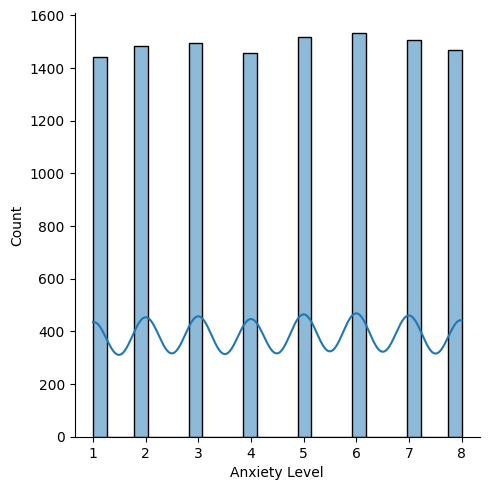

In [315]:
plt.figure(figsize=(18,12))
data=df.copy()
data['Anxiety Level'] = pd.to_numeric(df['Anxiety Level'], errors='coerce')
data=data[data['Anxiety Level']<data['Anxiety Level'].quantile(0.80)]
sns.displot(data['Anxiety Level'].sort_values(),kde=True)
plt.show()

In [263]:
df["Stress Level (GSR)"].nunique()

451

In [264]:
df["Stress Level (GSR)"].unique()

array([0.92, 1.17, 4.56, 3.07, 3.93, 4.96, 2.93, 2.17, 4.4 , 1.44, 3.79,
       4.82, 3.29, 2.87, 3.37, 4.48, 2.92, 3.2 , 2.35, 4.09, 1.34, 0.51,
       2.45, 2.9 , 1.89, 0.72, 4.94, 4.62, 4.04, 1.87, 4.33, 3.27, 1.39,
       2.04, 0.7 , 1.91, 4.58, 0.55, 2.64, 4.37, 2.16, 3.09, 2.53, 4.84,
       4.69, 4.46, 4.29, 1.2 , 0.94, 1.53, 2.67, 1.06, 2.  , 2.56, 2.6 ,
       4.1 , 1.9 , 2.28, 4.79, 4.72, 4.66, 1.65, 0.96, 2.76, 3.39, 4.3 ,
       3.95, 1.55, 1.27, 1.64, 4.11, 4.52, 2.69, 3.76, 4.16, 0.59, 4.23,
       3.82, 1.82, 0.67, 1.72, 1.96, 1.94, 0.57, 2.75, 3.56, 4.75, 3.89,
       4.28, 1.01, 2.7 , 4.87, 3.71, 2.99, 1.74, 4.21, 1.1 , 0.84, 4.95,
       4.86, 1.25, 3.54, 1.12, 3.04, 4.  , 0.79, 2.72, 4.5 , 3.23, 1.41,
       1.62, 1.71, 4.47, 3.06, 4.6 , 1.32, 1.5 , 3.85, 2.27, 1.52, 1.19,
       0.6 , 3.62, 2.4 , 1.38, 1.93, 4.31, 3.48, 4.74, 1.73, 1.36, 0.85,
       0.82, 3.67, 2.47, 2.44, 4.25, 1.84, 0.65, 0.75, 4.32, 2.07, 2.29,
       4.01, 2.37, 1.92, 2.09, 1.26, 3.03, 2.03, 3.

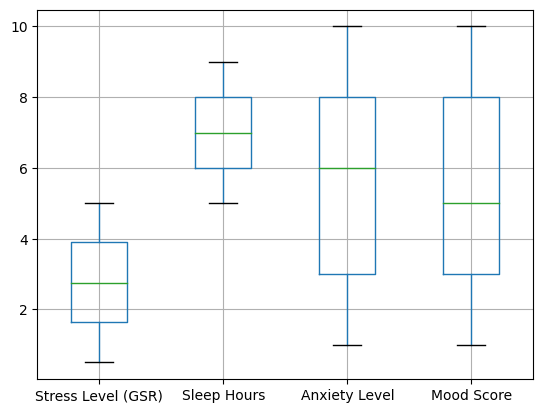

In [265]:
data[['Stress Level (GSR)', 'Sleep Hours', 'Anxiety Level', 'Mood Score']].boxplot()
plt.show()

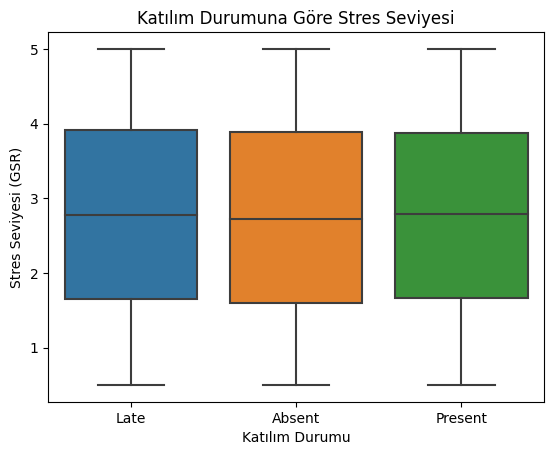

In [267]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Attendance Status', y='Stress Level (GSR)', data=df)
plt.title('Katılım Durumuna Göre Stres Seviyesi')
plt.xlabel('Katılım Durumu')
plt.ylabel('Stres Seviyesi (GSR)')
plt.show()

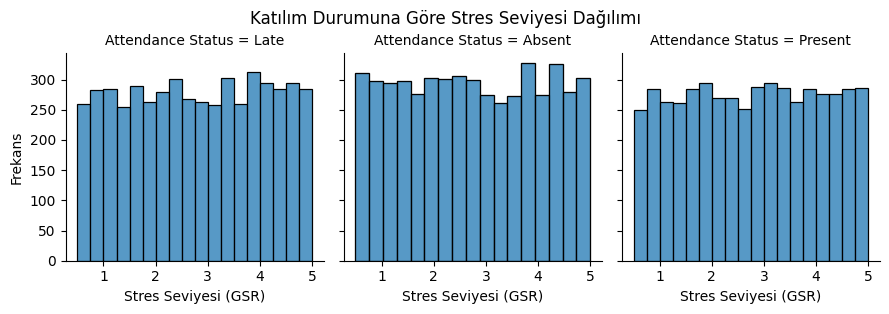

In [268]:
g = sns.FacetGrid(df, col='Attendance Status')
g.map(sns.histplot, 'Stress Level (GSR)')
g.set_axis_labels('Stres Seviyesi (GSR)', 'Frekans')
g.fig.suptitle('Katılım Durumuna Göre Stres Seviyesi Dağılımı', y=1.03)
plt.show()


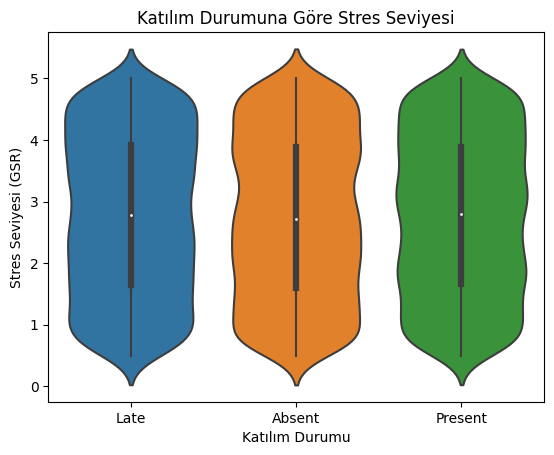

In [269]:
sns.violinplot(x='Attendance Status', y='Stress Level (GSR)', data=df)
plt.title('Katılım Durumuna Göre Stres Seviyesi')
plt.xlabel('Katılım Durumu')
plt.ylabel('Stres Seviyesi (GSR)')
plt.show()


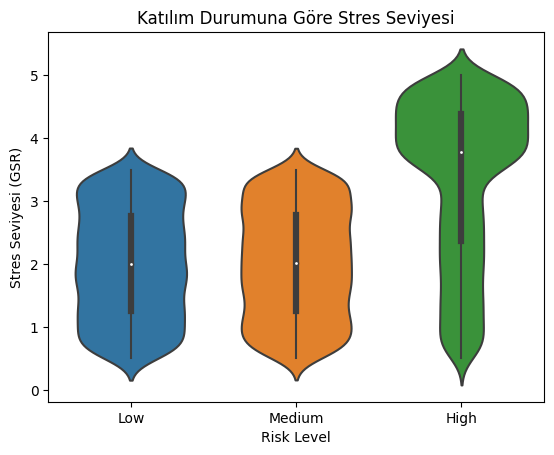

In [270]:
sns.violinplot(x='Risk Level', y='Stress Level (GSR)', data=df)
plt.title('Katılım Durumuna Göre Stres Seviyesi')
plt.xlabel('Risk Level')
plt.ylabel('Stres Seviyesi (GSR)')
plt.show()


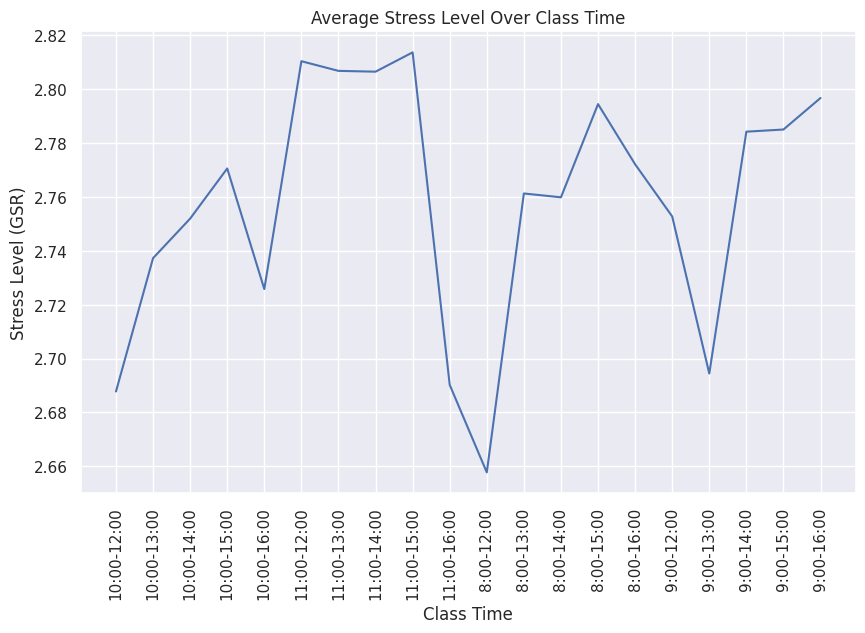

In [332]:
sns.set(rc = {'figure.figsize':(10,6)})
time_group = data.groupby('Class Time')['Stress Level (GSR)'].mean().reset_index()
sns.lineplot(data = time_group, 
             x = 'Class Time', y = 'Stress Level (GSR)')
plt.title('Average Stress Level Over Class Time')
plt.xticks(rotation = 90)
plt.show()

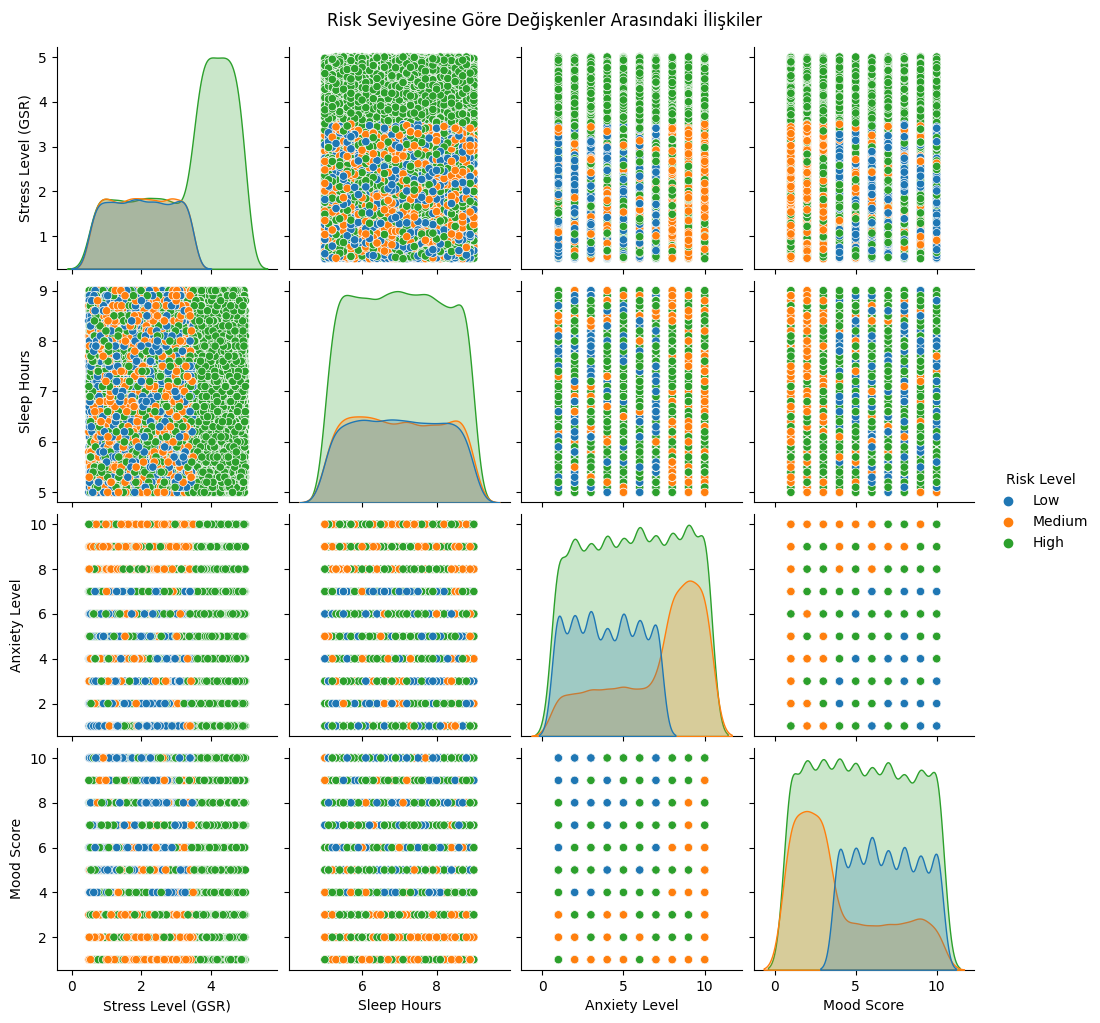

In [271]:
sns.pairplot(df, hue='Risk Level', vars=['Stress Level (GSR)', 'Sleep Hours', 'Anxiety Level', 'Mood Score'])
plt.suptitle('Risk Seviyesine Göre Değişkenler Arasındaki İlişkiler', y=1.02)
plt.show()

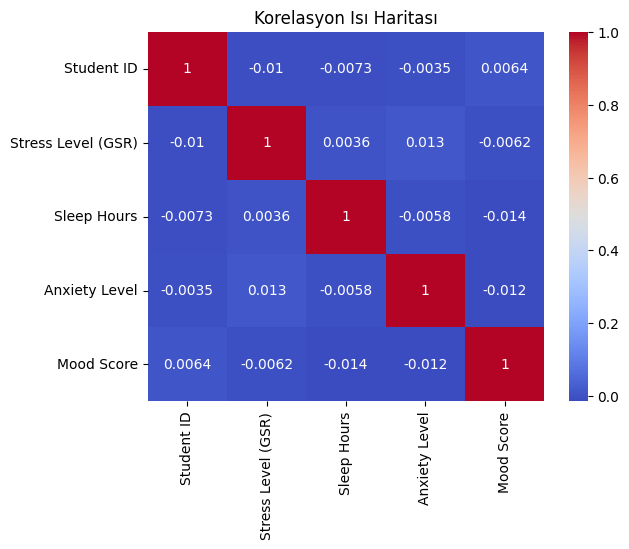

In [272]:
# Korelasyon matrisini hesapla
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasyon Isı Haritası')
plt.show()

In [273]:
mean_value = df['Stress Level (GSR)'].mean() 
print(f"Ortalama (Mean): {mean_value}")

Ortalama (Mean): 2.762538


In [274]:
# Stres Seviyesi sütununun medyanını hesapla
median_value = df['Stress Level (GSR)'].median()
print(f"Medyan (Median): {median_value}")

Medyan (Median): 2.76


In [275]:
# Katılım Durumu sütununun modunu hesapla
values, counts = np.unique(df['Attendance Status'], return_counts=True)
index = np.argmax(counts)
mode_value = values[index]
mode_frequency = counts[index]

print(f"Mod (Mode): {mode_value} (Frekans: {mode_frequency})")

Mod (Mode): Late (Frekans: 5032)


In [276]:
# Stres Seviyesi sütununun standart sapmasını hesapla
std_dev = df['Stress Level (GSR)'].std()
print(f"Standart Sapma: {std_dev}")

Standart Sapma: 1.3019266259734563


In [277]:
# Stres Seviyesi sütununun varyansını hesapla
variance_value = df['Stress Level (GSR)'].var()
print(f"Varyans: {variance_value}")

Varyans: 1.6950129394186277


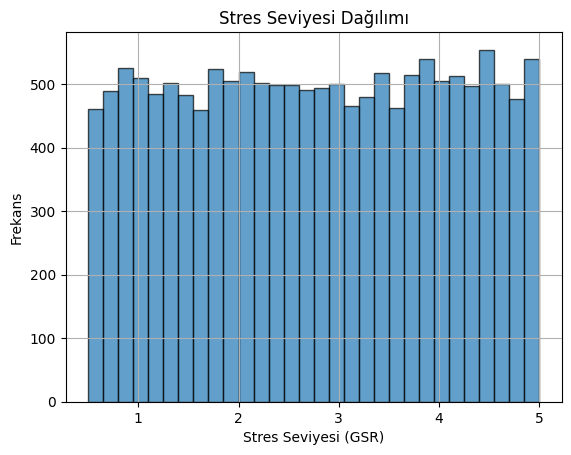

In [278]:
# Stres Seviyesi sütununun dağılımını histogram ile görselleştirme
plt.hist(df['Stress Level (GSR)'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Stres Seviyesi Dağılımı')
plt.xlabel('Stres Seviyesi (GSR)')
plt.ylabel('Frekans')
plt.grid(True)
plt.show()


In [279]:
from scipy import stats

data = df['Stress Level (GSR)']

# Ortalamanın belirli bir değerden farklı olup olmadığını test et (örneğin, 3)
t_statistic, p_value = stats.ttest_1samp(data, 3)
print(f"T-istatistiği: {t_statistic}, P-değeri: {p_value}")


T-istatistiği: -22.338460620461937, P-değeri: 9.218442145547008e-109


In [280]:
# Ortalama ve standart hata hesaplama
mean = np.mean(data)
stderr = stats.sem(data)

# %95 güven aralığı hesaplama
confidence_interval = stats.t.interval(0.95, len(data)-1, loc=mean, scale=stderr)
print(f"%95 Güven Aralığı: {confidence_interval}")

%95 Güven Aralığı: (2.7417015361075365, 2.783374463892464)


In [281]:
import statsmodels.api as sm

# Bağımsız ve bağımlı değişkenler
X = df['Sleep Hours']
y = df['Stress Level (GSR)']

# Bağımsız değişkene sabit ekleme
X = sm.add_constant(X)

# Regresyon modeli oluşturma
model = sm.OLS(y, X).fit()

# Model özeti
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     Stress Level (GSR)   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1917
Date:                Sun, 08 Dec 2024   Prob (F-statistic):              0.662
Time:                        08:06:49   Log-Likelihood:                -25241.
No. Observations:               15000   AIC:                         5.049e+04
Df Residuals:                   14998   BIC:                         5.050e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.7342      0.065     41.748      

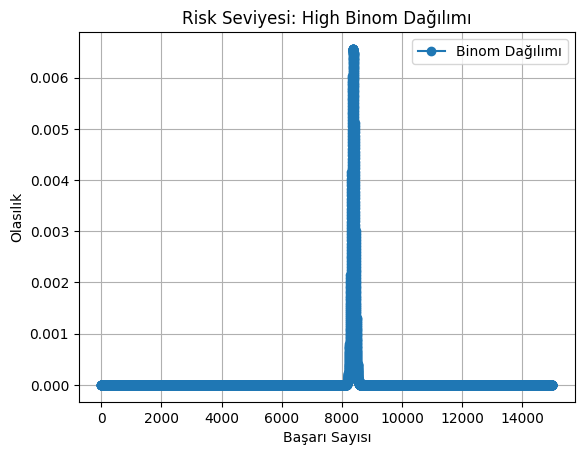

In [282]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# n: deneme sayısı (toplam öğrenci sayısı)
n = len(df)

# p: başarı olasılığı (risk seviyesinin 'High' olma olasılığı)
p = len(df[df['Risk Level'] == 'High']) / n

# Başarı sayısı (örneğin, 0'dan n'ye kadar)
k = np.arange(0, n+1)

# Binom dağılımı olasılıkları
binom_probs = binom.pmf(k, n, p)

# Binom dağılımını görselleştirme
plt.plot(k, binom_probs, 'o-', label='Binom Dağılımı')
plt.title('Risk Seviyesi: High Binom Dağılımı')
plt.xlabel('Başarı Sayısı')
plt.ylabel('Olasılık')
plt.legend()
plt.grid(True)
plt.show()

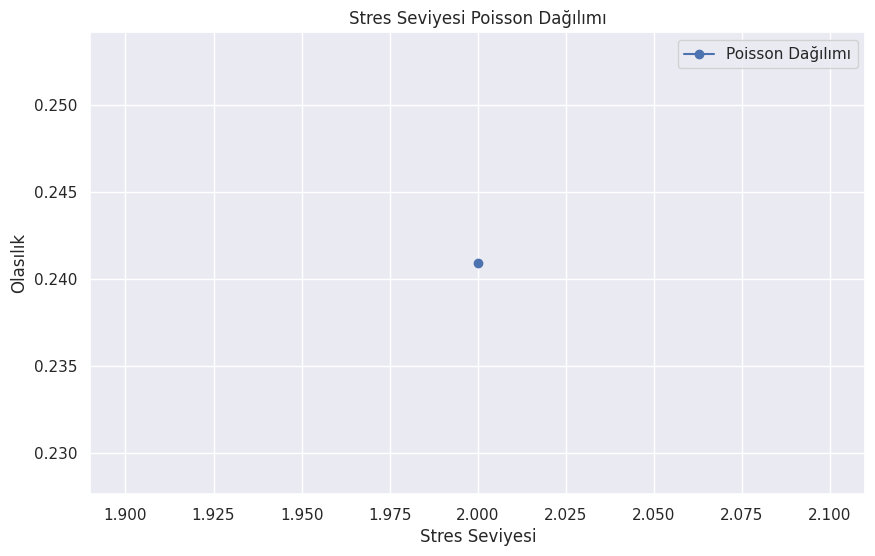

In [350]:
from scipy.stats import poisson

# λ: ortalama olay sayısı 
λ = np.mean(df['Stress Level (GSR)'])

# k: belirli zaman dilimindeki olay sayısı
k = 2

# Poisson dağılımı olasılıkları
poisson_probs = poisson.pmf(k, λ)

# Poisson dağılımını görselleştirme
plt.plot(k, poisson_probs, 'o-', label='Poisson Dağılımı')
plt.title('Stres Seviyesi Poisson Dağılımı')
plt.xlabel('Stres Seviyesi')
plt.ylabel('Olasılık')
plt.legend()
plt.grid(True)
plt.show()


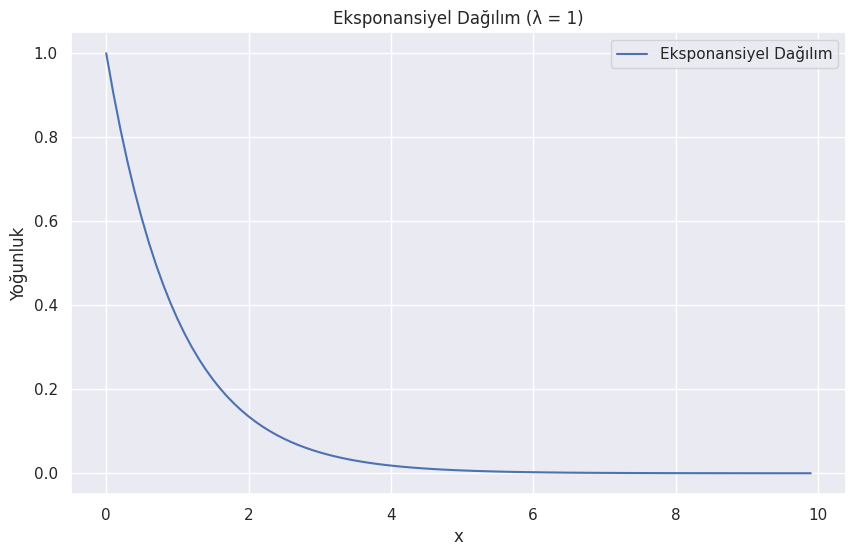

In [349]:
from scipy.stats import expon

# Lambda (λ) değeri
λ = 1
# x değerleri 
x = np.arange(0, 10, 0.1)

# Eksponansiyel dağılım olasılık yoğunluk fonksiyonu
pdf = expon.pdf(x, scale=1/λ)

# Eksponansiyel dağılım grafiği
plt.plot(x, pdf, label='Eksponansiyel Dağılım')
plt.title('Eksponansiyel Dağılım (λ = 1)')
plt.xlabel('x')
plt.ylabel('Yoğunluk')
plt.legend()
plt.grid(True)
plt.show()


In [285]:
# Risk Seviyesi 'High' olan öğrencilerin stres seviyeleri
group1 = df[df['Risk Level'] == 'High']['Stress Level (GSR)']

# Risk Seviyesi 'Low' olan öğrencilerin stres seviyeleri
group2 = df[df['Risk Level'] == 'Low']['Stress Level (GSR)']

In [286]:
from scipy.stats import ttest_ind
# Hipotez testi
t_stat, p_value = ttest_ind(group1, group2)

print(f"T-istatistiği: {t_stat}")
print(f"P-değeri: {p_value}")

# Karar
if p_value < 0.05:
    print("Sonuç anlamlı: İki grup ortalaması farklı.")
else:
    print("Sonuç anlamlı değil: İki grup ortalaması farklı değil.")


T-istatistiği: 55.100171540832385
P-değeri: 0.0
Sonuç anlamlı: İki grup ortalaması farklı.


In [346]:
from scipy.stats import f_oneway

# Farklı grupların stres seviyelerini seçme
group1 = df[df['Risk Level'] == 'Low']['Stress Level (GSR)']
group2 = df[df['Risk Level'] == 'Medium']['Stress Level (GSR)']
group3 = df[df['Risk Level'] == 'High']['Stress Level (GSR)']

# ANOVA testi
f_statistic, p_value = f_oneway(group1, group2, group3)
print(f"F-istatistiği: {f_statistic}, P-değeri: {p_value}")


F-istatistiği: 2649.7507426128755, P-değeri: 0.0


In [288]:
from scipy.stats import mannwhitneyu

# İki farklı grubun stres seviyelerini karşılaştır
group1 = df[df['Risk Level'] == 'Low']['Stress Level (GSR)']
group2 = df[df['Risk Level'] == 'High']['Stress Level (GSR)']

# Mann-Whitney U testi
u_statistic, p_value = mannwhitneyu(group1, group2)
print(f"U-istatistiği: {u_statistic}, P-değeri: {p_value}")

U-istatistiği: 5546920.0, P-değeri: 0.0


In [289]:
from scipy.stats import chisquare

# Gözlenen frekanslar
observed = [50, 30, 20]  # Present, Late, Absent

# Beklenen frekanslar
expected = [40, 40, 20]  # Beklenen değerler

# Chi-square goodness of fit testi
chi2_stat, p_value = chisquare(observed, expected)

print(f"Chi-square değeri: {chi2_stat}")
print(f"P-değeri: {p_value}")

# Karar
if p_value < 0.05:
    print("Sonuç anlamlı: Gözlenen ve beklenen frekanslar arasında fark var.")
else:
    print("Sonuç anlamlı değil: Gözlenen ve beklenen frekanslar arasında fark yok.")


Chi-square değeri: 5.0
P-değeri: 0.0820849986238988
Sonuç anlamlı değil: Gözlenen ve beklenen frekanslar arasında fark yok.


In [290]:

from scipy.stats import chi2_contingency

# Kontenjans tablosu oluştur
contingency_table = pd.crosstab(df['Stress Level (GSR)'], df['Risk Level'])

# Chi-square bağımsızlık testi
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square değeri: {chi2_stat}")
print(f"P-değeri: {p_value}")
print(f"Serbestlik derecesi: {dof}")
print("Beklenen frekanslar tablosu:")
print(expected)

# Karar
if p_value < 0.05:
    print("Sonuç anlamlı: İki kategorik değişken bağımsız değil.")
else:
    print("Sonuç anlamlı değil: İki kategorik değişken bağımsız.")


Chi-square değeri: 6736.274537343217
P-değeri: 0.0
Serbestlik derecesi: 900
Beklenen frekanslar tablosu:
[[ 9.49733333  3.70713333  3.79553333]
 [14.52533333  5.66973333  5.80493333]
 [18.99466667  7.41426667  7.59106667]
 ...
 [17.31866667  6.76006667  6.92126667]
 [16.20133333  6.32393333  6.47473333]
 [12.84933333  5.01553333  5.13513333]]
Sonuç anlamlı: İki kategorik değişken bağımsız değil.


In [291]:
from scipy.stats import pearsonr
# Pearson korelasyon katsayısını hesaplama
correlation, p_value = pearsonr(df['Stress Level (GSR)'], df['Sleep Hours'])

print(f"Pearson Korelasyon Katsayısı: {correlation}")
print(f"P-değeri: {p_value}")

# Karar
if p_value < 0.05:
    print("Sonuç anlamlı: İki değişken arasında doğrusal ilişki var.")
else:
    print("Sonuç anlamlı değil: İki değişken arasında doğrusal ilişki yok.")


Pearson Korelasyon Katsayısı: 0.0035751241642718395
P-değeri: 0.6615121263366683
Sonuç anlamlı değil: İki değişken arasında doğrusal ilişki yok.


In [292]:
from scipy.stats import spearmanr
# Spearman korelasyon katsayısını hesapla
correlation, p_value = spearmanr(df['Stress Level (GSR)'], df['Sleep Hours'])

print(f"Spearman Korelasyon Katsayısı: {correlation}")
print(f"P-değeri: {p_value}")

# Karar
if p_value < 0.05:
    print("Sonuç anlamlı: İki değişken arasında monoton ilişki var.")
else:
    print("Sonuç anlamlı değil: İki değişken arasında monoton ilişki yok.")


Spearman Korelasyon Katsayısı: 0.003510924568082821
P-değeri: 0.6672217005450801
Sonuç anlamlı değil: İki değişken arasında monoton ilişki yok.


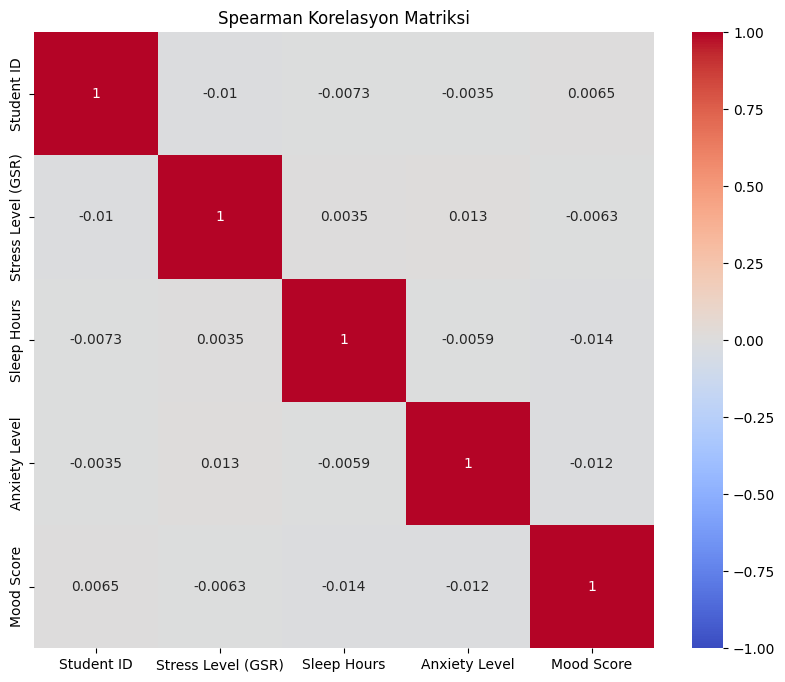

In [293]:
# Sadece sayısal sütunları seç
numeric_df = df.select_dtypes(include=[np.number])

# Spearman korelasyon matrisini hesapla
correlation_matrix = numeric_df.corr(method='spearman')

# Korelasyon ısı haritasını oluştur ve görselleştir
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Korelasyon Matriksi')
plt.show()


In [294]:
# Spearman korelasyon katsayısını hesapla
correlation, p_value = spearmanr(df['Stress Level (GSR)'], df['Anxiety Level'])

print(f"Spearman Korelasyon Katsayısı: {correlation}")
print(f"P-değeri: {p_value}")

# Karar
if p_value < 0.05:
    print("Sonuç anlamlı: İki değişken arasında monoton ilişki var.")
else:
    print("Sonuç anlamlı değil: İki değişken arasında monoton ilişki yok.")


Spearman Korelasyon Katsayısı: 0.013127059482199327
P-değeri: 0.10790853354342102
Sonuç anlamlı değil: İki değişken arasında monoton ilişki yok.


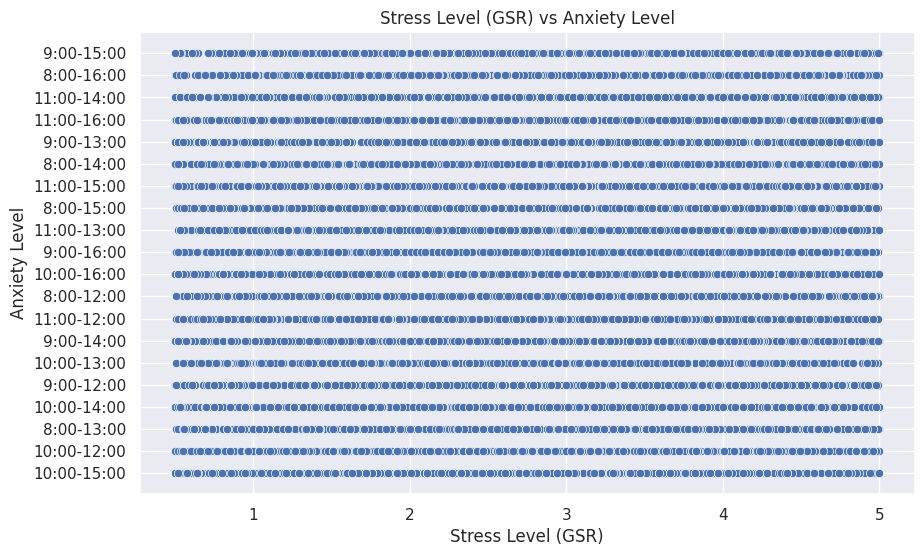

In [335]:
# Scatter plot oluşturma
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Stress Level (GSR)', y='Class Time', data=df)
plt.title('Stress Level (GSR) vs Anxiety Level')
plt.xlabel('Stress Level (GSR)')
plt.ylabel('Anxiety Level')
plt.grid(True)
plt.show()


Eğim (Coefficient): 0.0059644944403091805
Y-Kesmesi (Intercept): 2.7294537446055305


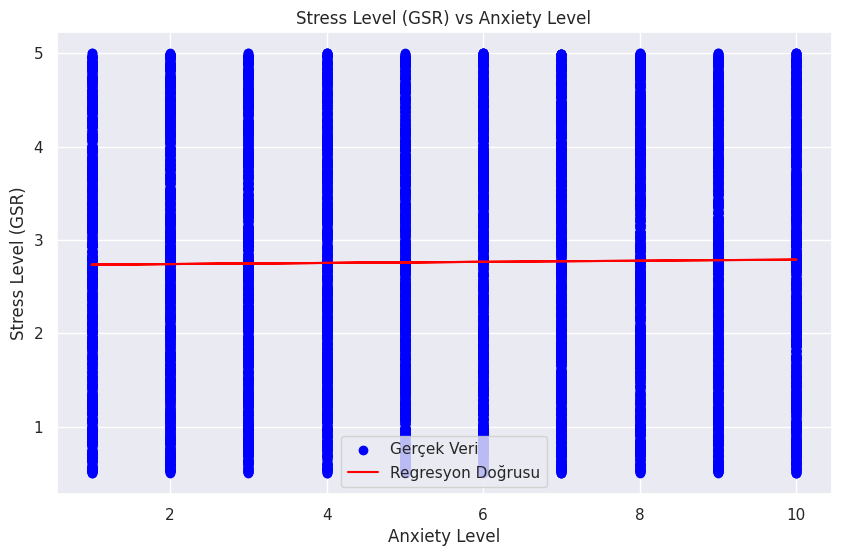

In [336]:
from sklearn.linear_model import LinearRegression


# Bağımsız ve bağımlı değişkenler
X = df[['Anxiety Level']]
y = df['Stress Level (GSR)']

# Model oluşturma
model = LinearRegression()
model.fit(X, y)

# Tahminler
y_pred = model.predict(X)

# Katsayılar
print(f"Eğim (Coefficient): {model.coef_[0]}")
print(f"Y-Kesmesi (Intercept): {model.intercept_}")

# Scatter plot ve regresyon doğrusu
plt.scatter(df['Anxiety Level'], df['Stress Level (GSR)'], color='blue', label='Gerçek Veri')
plt.plot(df['Anxiety Level'], y_pred, color='red', label='Regresyon Doğrusu')
plt.title('Stress Level (GSR) vs Anxiety Level')
plt.xlabel('Anxiety Level')
plt.ylabel('Stress Level (GSR)')
plt.legend()
plt.grid(True)
plt.show()


Ortalama Kare Hatası (MSE): 1.6945975949251613
R-Kare (R^2) Değeri: 0.00017838435412087517


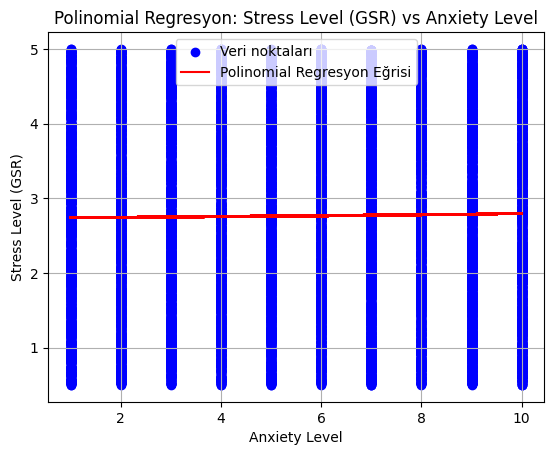

In [297]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Bağımsız ve bağımlı değişkenler
X = df[['Anxiety Level']]
y = df['Stress Level (GSR)']

# Polinomial özellikler oluştur
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Doğrusal regresyon modelini eğit
model = LinearRegression()
model.fit(X_poly, y)

# Tahminler
y_pred = model.predict(X_poly)

# Model performansı
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Ortalama Kare Hatası (MSE): {mse}")
print(f"R-Kare (R^2) Değeri: {r2}")

# Scatter plot ve polinomial regresyon eğrisi
plt.scatter(X, y, color='blue', label='Veri noktaları')
plt.plot(X, y_pred, color='red', label='Polinomial Regresyon Eğrisi')
plt.title('Polinomial Regresyon: Stress Level (GSR) vs Anxiety Level')
plt.xlabel('Anxiety Level')
plt.ylabel('Stress Level (GSR)')
plt.legend()
plt.grid(True)
plt.show()
